In [1]:
import torch
import torchvision
import argparse
import matplotlib.pyplot as plt
import os

# cd to repo directory
os.chdir('..')

from cae import CAE
from restore_dataset import build_dataset, get_args_parser

/Users/shaofan/PycharmProjects/zi-venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
parser = argparse.ArgumentParser('Denoise Dataset', parents=[get_args_parser()])
args, _ = parser.parse_known_args()
print(args)

Namespace(data_set='image_folder', data_path='DicData', eval_data_path='DicData', nb_classes=3751)


In [4]:
# specify your checkpoint location here
checkpoint = 'checkpoint-cae.pth'
!ls -hl $checkpoint

-rw-r--r--@ 1 shaofan  staff   585M Jun 30 11:27 checkpoint-cae.pth


In [5]:
model = CAE(512)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
ckpt = torch.load(checkpoint, map_location=device)
model.load_state_dict(ckpt['model'])
model.eval()

CAE(
  (encoder): ConvNeXt(
    (downsample_layers): ModuleList(
      (0): Sequential(
        (0): Conv2d(2, 96, kernel_size=(4, 4), stride=(4, 4))
        (1): LayerNorm()
      )
      (1): Sequential(
        (0): LayerNorm()
        (1): Conv2d(96, 192, kernel_size=(2, 2), stride=(2, 2))
      )
      (2): Sequential(
        (0): LayerNorm()
        (1): Conv2d(192, 384, kernel_size=(2, 2), stride=(2, 2))
      )
      (3): Sequential(
        (0): LayerNorm()
        (1): Conv2d(384, 768, kernel_size=(2, 2), stride=(2, 2))
      )
    )
    (stages): ModuleList(
      (0): Sequential(
        (0): Block(
          (dwconv): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (norm): LayerNorm()
          (pwconv1): Linear(in_features=96, out_features=384, bias=True)
          (act): GELU(approximate='none')
          (pwconv2): Linear(in_features=384, out_features=96, bias=True)
          (drop_path): Identity()
        )
        (1): Block(
 

In [6]:
# create dataset and dataloader
dataset, args.nb_classes = build_dataset(args=args)
data_loader = torch.utils.data.DataLoader(
    dataset, shuffle=True,
    batch_size=1
)

Number of the class = 3751


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


noisy shape torch.Size([1, 224, 224])
original shape torch.Size([1, 224, 224])
output shape torch.Size([1, 224, 224])


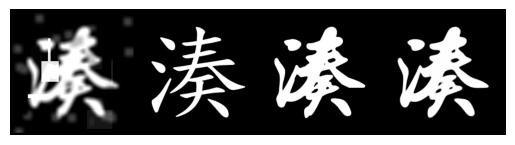

In [17]:
# Extract inputs and labels from the batch
for batch_data in data_loader:
    input_img, original = batch_data
    break

with torch.no_grad():
    output = model(input_img)
    

noisy = input_img[:, 0, :, :]
standard = input_img[:, 1, :, :]
original = torch.squeeze(original, dim=0)
output = torch.squeeze(output, dim=0)
print(f"noisy shape {noisy.shape}")
print(f"original shape {original.shape}")
print(f"output shape {output.shape}")

# visualization
grid_img = torchvision.utils.make_grid([noisy, standard, original, output], nrow=4, padding=4)
plt.imshow(grid_img.permute(1, 2, 0), cmap='gray')
plt.axis('off')
plt.show()